# 🛒 E-Commerce Sales Analysis Dashboard  
**Objective:**  
Analyze an online retailer’s sales data to identify trends, customer segments, and key drivers of revenue growth.  

**Key Business Questions:**  
- Who are the top customers by revenue?  
- Which products generate the highest sales?  
- What are the monthly/seasonal revenue trends?  
- What’s the return rate and refund pattern?  
- How can customer behavior guide business decisions?

### Project Summary :-
This project involves end-to-end data analysis — from data cleaning and transformation to visualization and insight generation — using Python and its data analysis libraries.

### Tools & Techniques :-
**Python**, **Pandas**, **Matplotlib**, **Seaborn** 

### Business Impact :-
By identifying key sales drivers and customer behavior, this analysis helps optimize inventory planning, improve customer targeting, and enhance profitability.

## Setup & Data Copy :-

In [1]:
# =========================================================================
# Import Libraries :-
# =========================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# =========================================================================
# Load Data :-
# =========================================================================
df = pd.read_csv("data.csv", encoding='latin1')
df_full = df.copy() # better to work on a copy to preserve the orignal data

# =========================================================================
# Quick Overview
# =========================================================================
print("Dataset Shape:", df_full.shape)
print("\nData Types:\n", df_full.dtypes)
print("\nMissing Values:\n", df_full.isnull().sum())


Dataset Shape: (541909, 8)

Data Types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Missing Values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [2]:
# Findings :-

# Shape of DataSet : (541909, 8)

# Country : All the countries are in the same and single format.

# Missing values :-
# Descripition - 1454 from 541909 
#               (0.26 % of all sales does not have Descripition of product 
#                 also unit price is 0. )

# CustomerID - 135080 from 541909 
#              (24.92 % of all sales means these are the customers which 
#                are not regestered but sales are real)

# Unit_Price or Quantity are zeros in some rows.

## Data Cleaning :-

In [3]:
# =========================================================================
# Handle Missing Values :-
# =========================================================================
# Drop rows missing description :-
df_full = df_full.dropna(subset=["Description"])

# Check the rows where ("Quantity" = 0 or Unit_Price = 0) :-
print(f"Rows with (quantity = 0) :{df_full[df_full["Quantity"] == 0].shape}\n\n")
print(f"Rows with (Unit_Price = 0) : {df_full[df_full["UnitPrice"] == 0].shape}\n\n")

# Drop the rows with (Unit_Price = 0) :-
df_full = df_full[df_full["UnitPrice"] != 0]

# Recheck rows with (unit_price = 0) :-
print(f"Recheck rows with (Unit_Price = 0) : {df_full[df_full["UnitPrice"] == 0].shape}\n\n")

# Replace missing CustomerID with 0 (unregistered).
df_full["CustomerID"] = df_full["CustomerID"].fillna(0).astype(int)

# Tag (Registered / Unregistered) Customers Flag :-
df_full["Is_Registered"] = np.where(df_full["CustomerID"] == 0, "Unregistered", "Registered")

# =========================================================================
# Handle Duplicates :-
# =========================================================================
print(f"Duplicate Rows : {df_full.duplicated().sum()}\n\n")
df_full = df_full.drop_duplicates(keep = "first")
print(f"Duplicate Rows after : {df_full.duplicated().sum()}\n\n")


# =========================================================================
# Handle Data Types :-
# =========================================================================
df_full["InvoiceDate"] = pd.to_datetime(df_full["InvoiceDate"])
df_full["Total_Price"] = df_full["Quantity"] * df_full["UnitPrice"]

# =========================================================================
# Handle Returns (Negative Quantities)
# =========================================================================
df_full["Transcation_Type"] = np.where(df_full["Quantity"] < 0, "Return", "Sales")
print(df_full["Transcation_Type"].value_counts(),"\n\n")

Rows with (quantity = 0) :(0, 8)


Rows with (Unit_Price = 0) : (1061, 8)


Recheck rows with (Unit_Price = 0) : (0, 8)


Duplicate Rows : 5263


Duplicate Rows after : 0


Transcation_Type
Sales     524880
Return      9251
Name: count, dtype: int64 




## Feature Engineering :-

In [4]:
# =========================================================================
# Add Time Columns :-
# =========================================================================
df_full["InvoiceYear"] = df_full["InvoiceDate"].dt.year # Year Column
df_full["InvoiceMonth"] = df_full["InvoiceDate"].dt.month # Month Column
df_full["InvoiceMonth_Year"] = df_full["InvoiceDate"].dt.to_period('M') # MonthYear Column

# =========================================================================
# Reset index
# =========================================================================
df_full = df_full.reset_index(drop=True)

In [5]:
# =========================================================================
# DataSet is ready for analysis :-
# =========================================================================

print(df_full.isnull().sum(),"\n\n\n")
print(df_full.info(),"\n\n\n")
print(df_full.describe(),"\n\n\n")


InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Is_Registered        0
Total_Price          0
Transcation_Type     0
InvoiceYear          0
InvoiceMonth         0
InvoiceMonth_Year    0
dtype: int64 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534131 entries, 0 to 534130
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          534131 non-null  object        
 1   StockCode          534131 non-null  object        
 2   Description        534131 non-null  object        
 3   Quantity           534131 non-null  int64         
 4   InvoiceDate        534131 non-null  datetime64[ns]
 5   UnitPrice          534131 non-null  float64       
 6   CustomerID         534131 non-null  int64         
 7   Country            534131 non-null  objec

### Observations :-

1. Quantity & UnitPrice :

   - Some extreme values ( Quantity > 80k, UnitPrice > 38k) in sales also in returns -- Likely outliers        or bulk orders.

2. Total_Price:

   - (Max = 168469) -- heavily skewed by extreme orders.
   - (Mean = 18.12), (Median = 9.87) -- skewed distribution.

3. CustomerID :

   - 0 - "Unknown" customers (handled).

4. InvoiceDate :

   - Range: 2010-12-01 to 2011-12-09 

## Handle the outliers :-

In [6]:
# =========================================================================
# Detect Outliers (Only on valid positive sales) :-
# =========================================================================
sales_data = df_full[df_full["Transcation_Type"] == "Sales"]
print("Distribution Check :\n", sales_data[["Quantity","UnitPrice","Total_Price"]].
    describe(percentiles=[.0001,.01,.05,.25,.5,.75,.95,.99,.9999]),"\n\n")

lower_bound = sales_data["Total_Price"].quantile(0.01)
upper_bound = sales_data["Total_Price"].quantile(0.99)

df_full["Outlier_Flag"] = np.where(
    (df_full["Transcation_Type"] == "Sales") &
    ((df_full["Total_Price"] < lower_bound) | (df_full["Total_Price"] > upper_bound)),
    "Outliers",
    "Normal")

print(df_full["Outlier_Flag"].value_counts())

Distribution Check :
              Quantity      UnitPrice    Total_Price
count   524880.000000  524880.000000  524880.000000
mean        10.616564       3.880407      20.233171
std        156.279734      42.063124     272.552926
min          1.000000  -11062.060000  -11062.060000
0.01%        1.000000       0.040000       0.190000
1%           1.000000       0.290000       0.550000
5%           1.000000       0.420000       1.250000
25%          1.000000       1.250000       3.900000
50%          4.000000       2.080000       9.920000
75%         11.000000       4.130000      17.700000
95%         30.000000       9.950000      59.800000
99%        100.000000      16.980000     183.600000
99.99%    1434.145200    1012.862202    3007.651152
max      80995.000000   13541.330000  168469.600000 


Outlier_Flag
Normal      524857
Outliers      9274
Name: count, dtype: int64


#### This will allows to include or exclude them in different analyses.

## Save the clean Data :-

In [7]:
# =========================================================================
# Save the clean data :-
# =========================================================================
df_full.to_csv("Clean_Sales_Data.csv", index = False)

## Dataset summary & sanity checks :-

In [8]:
# =========================================================================
# Dataset Overview :-
# =========================================================================
print(f"Rows : {df_full.shape[0]}")
print(f"Total Revenue : {round(df_full["Total_Price"].sum(),2)}")
print(f"Unique Customers : {df_full["CustomerID"][df_full["CustomerID"] != 0].nunique()}")
print(f"Unique Products : {df_full["StockCode"].nunique()}")
print(f"Date range : {df_full["InvoiceDate"].dt.date.min()} to {df_full["InvoiceDate"].dt.date.max()}\n")

# =========================================================================
# Distribution :-
# =========================================================================
print(df_full[["Quantity", "UnitPrice", "Total_Price"]].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

Rows : 534131
Total Revenue : 9726006.95
Unique Customers : 4371
Unique Products : 3938
Date range : 2010-12-01 to 2011-12-09

            Quantity      UnitPrice    Total_Price
count  534131.000000  534131.000000  534131.000000
mean        9.916784       4.654426      18.209029
std       216.451709      97.460790     381.547578
min    -80995.000000  -11062.060000 -168469.600000
1%         -1.000000       0.290000      -6.750000
5%          1.000000       0.420000       0.850000
25%         1.000000       1.250000       3.750000
50%         3.000000       2.100000       9.900000
75%        10.000000       4.130000      17.570000
95%        30.000000       9.950000      59.400000
99%       100.000000      18.000000     182.600000
max     80995.000000   38970.000000  168469.600000


 ## Invoice - Level aggregation (Order - Level Analysis) :-

In [9]:
# =========================================================================
# Aggregate to Invoice Level :-
# =========================================================================
invoice_agg = (df_full.groupby("InvoiceNo")
    .agg({
        "Total_Price" : "sum",
        "Quantity" : "sum",
        "CustomerID" : "first",
        "InvoiceDate" : "min",
        "Country" : "first",
        "Is_Registered" : "first",
        "Transcation_Type" : "first"
    })
    .rename(columns = {"Total_Price" : "Invoice_Revenue", "Quantity" : "Invoice_Quantity"})
    .reset_index()
)
invoice_agg["InvoiceMonth_Year"] = invoice_agg["InvoiceDate"].dt.to_period("M")

# Change columns to date format and month-year column :-
invoice_agg["InvoiceDate"] = pd.to_datetime(invoice_agg["InvoiceDate"])
invoice_agg["InvoiceMonth_Year"] = invoice_agg["InvoiceDate"].dt.to_period("M")

## Core KPIs :-

In [10]:
# =========================================================================
# Core KPI Summary :-
# =========================================================================
kpis = {
    "Total Revenue": round(df_full["Total_Price"].sum(),2),
    "Total Orders": round(invoice_agg["InvoiceNo"].nunique(),2),
    "Total Customers": round(df_full[df_full["CustomerID"] != 0]["CustomerID"].nunique(),2),
    "Average Order Value (AOV)": round(invoice_agg["Invoice_Revenue"].mean(),2),
    "Median Order Value": round(invoice_agg["Invoice_Revenue"].median(),2),
    "Avg Items per Invoice": round(invoice_agg["Invoice_Quantity"].mean(),2)
}
print(pd.Series(kpis))


Total Revenue                9726006.95
Total Orders                   23798.00
Total Customers                 4371.00
Average Order Value (AOV)        408.69
Median Order Value               239.90
Avg Items per Invoice            222.58
dtype: float64


## Time Series : Monthly Revenue & Outlier Comparison :-

InvoiceMonth_Year
2010-12     746723.610
2011-01     558448.560
2011-02     497026.410
2011-03     682013.980
2011-04     492367.841
2011-05     722094.100
2011-06     689977.230
2011-07     680156.991
2011-08     681386.460
2011-09    1017596.682
2011-10    1069368.230
2011-11    1456145.800
2011-12     432701.060
Freq: M, Name: Total_Price, dtype: float64


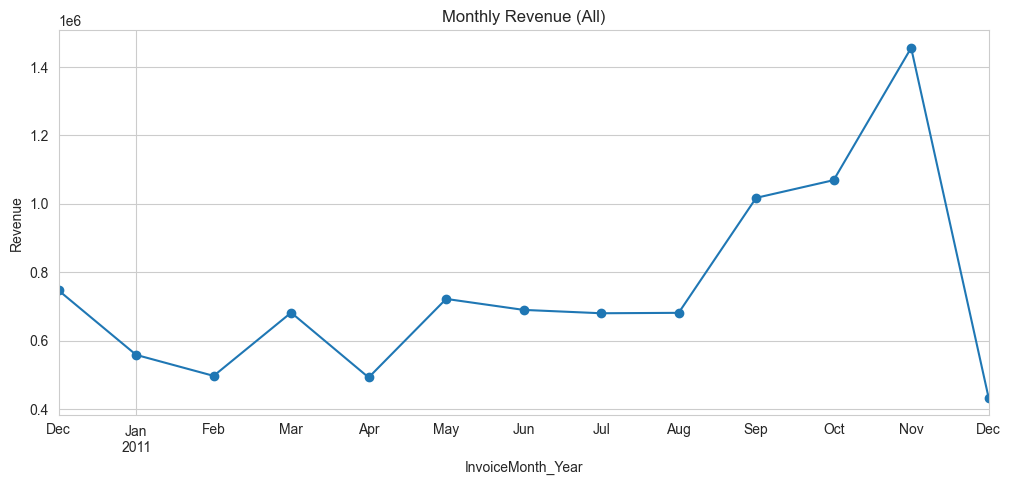

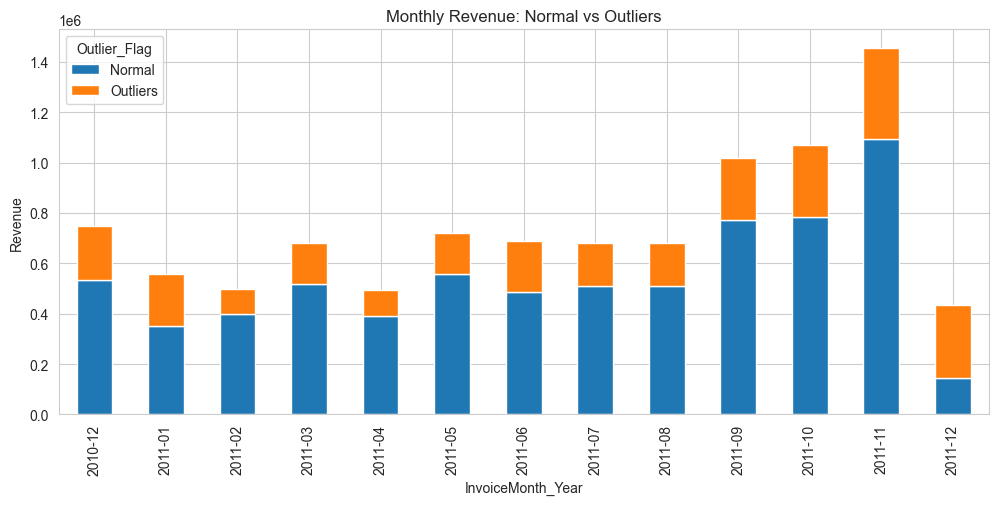

In [11]:
# =========================================================================
# Monthly Revenue (All vs Outlier):-
# =========================================================================
monthly = df_full.groupby("InvoiceMonth_Year")["Total_Price"].sum()
monthly_by_flag = df_full.groupby(["InvoiceMonth_Year","Outlier_Flag"])["Total_Price"].sum().unstack(fill_value=0)
print(monthly)

# Monthly Revenue :-
plt.figure(figsize=(12,5))
monthly.plot(marker='o')
plt.title("Monthly Revenue (All)")
plt.ylabel("Revenue")
plt.grid(True)
plt.savefig("Monthly_Revenue.png")
plt.show()

# Monthly Revenue Normal Vs Outliers :-
monthly_by_flag.plot(kind="bar", stacked=True, figsize=(12,5))
plt.title("Monthly Revenue: Normal vs Outliers")
plt.ylabel("Revenue")
plt.savefig("Monthly_Revenue_Normal_Vs_Outliers.png")
plt.show()

## Top Products :-

Top products by revenue:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164459.49
WHITE HANGING HEART T-LIGHT HOLDER     99612.42
PARTY BUNTING                          98243.88
JUMBO BAG RED RETROSPOT                92175.79
RABBIT NIGHT LIGHT                     66661.63
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63715.24
ASSORTED COLOUR BIRD ORNAMENT          58792.42
CHILLI LIGHTS                          53746.66
Name: Total_Price, dtype: float64


Top products by quantity:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47256
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35294
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26095
PACK OF 60 PI

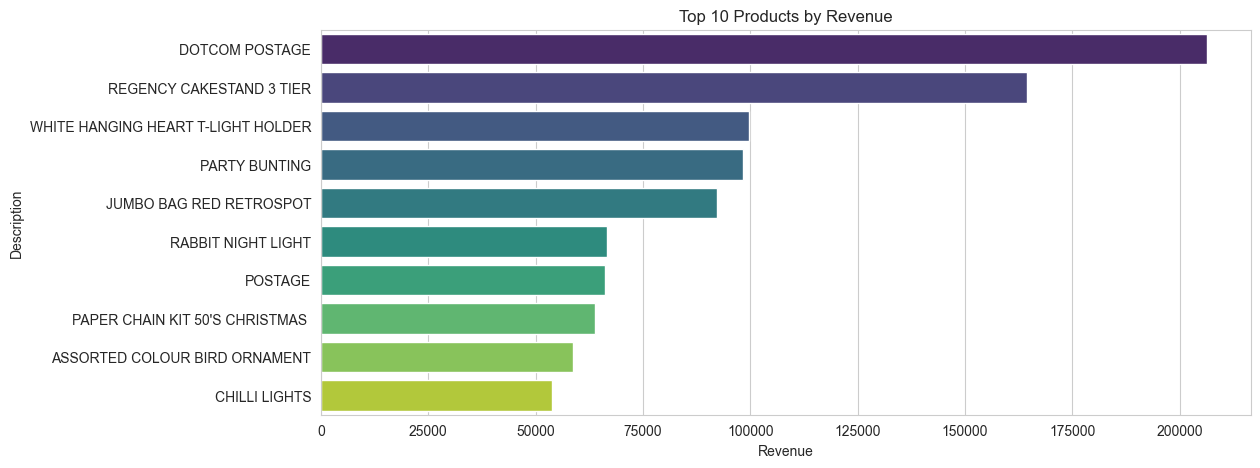

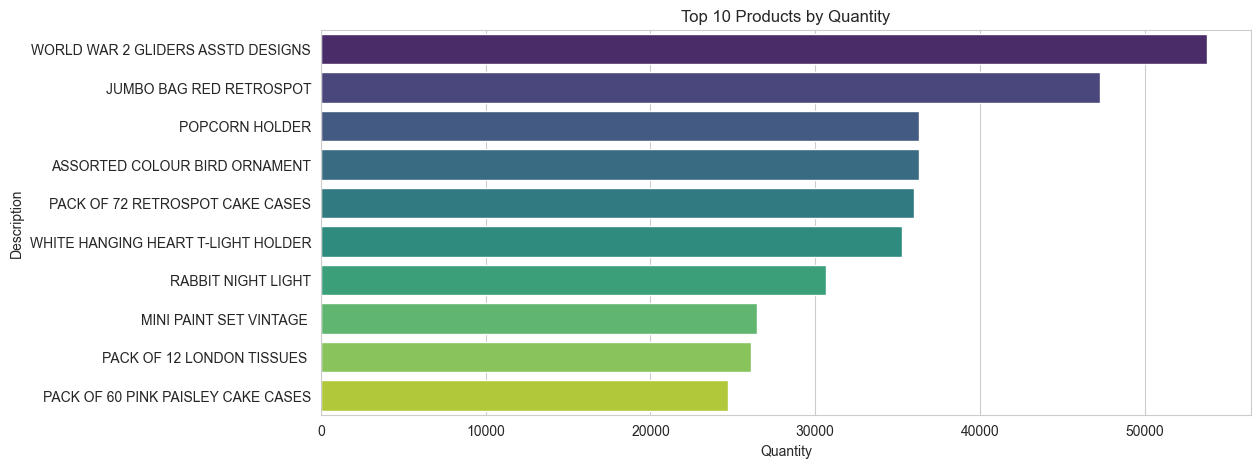

In [12]:
# =========================================================================
# Top Products :-
# =========================================================================
top_products_rev = df_full.groupby("Description")["Total_Price"].sum().sort_values(ascending=False).head(10)
top_products_qty = df_full.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

print(f"Top products by revenue:\n{top_products_rev}\n\n")
print(f"Top products by quantity:\n{top_products_qty}\n\n")

# Top products contribution in total revenue :-
top_products_perc_in_total = round(top_products_rev.sum() /df_full["Total_Price"].sum()* 100,2)
print(f"Top 10 Products contribution in total revenue = {top_products_perc_in_total}")

# Chart by Revenue :-
plt.figure(figsize=(12,5))
sns.barplot(x=top_products_rev.values,
            y=top_products_rev.index,
            palette="viridis",
            hue=top_products_rev.index,   
            dodge=False,               
            legend=False)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.savefig("Top_products_By_Revenue.png")
plt.show()


# Chart by Quantity :-
plt.figure(figsize=(12,5))
sns.barplot(x=top_products_qty.values,
            y=top_products_qty.index,
            palette="viridis",
            hue=top_products_rev.index,   
            dodge=False,               
            legend=False)
plt.title("Top 10 Products by Quantity")
plt.xlabel("Quantity")
plt.savefig("Top_products_By_Quantity.png")
plt.show()


## Top Customers :-

Top customers by revenue:
 CustomerID
14646    279489.02
18102    256438.49
17450    187322.17
14911    132458.73
12415    123725.45
14156    113214.59
17511     88125.38
16684     65892.08
13694     62690.54
15311     59284.19
Name: Total_Price, dtype: float64
Top 10 Customers contribution in total revenue = 14.07


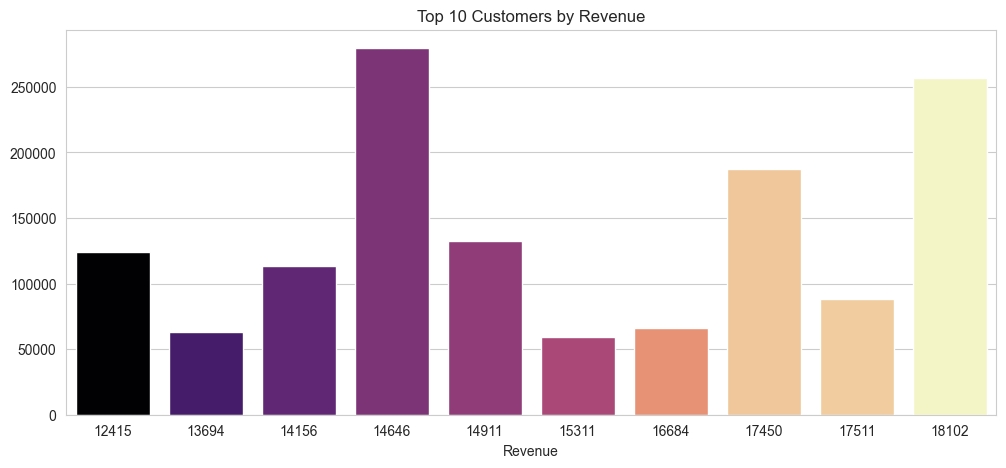

In [13]:
# =========================================================================
# Top Customers by Revenue :-
# =========================================================================
top_customers = df_full[df_full["CustomerID"] != 0]\
    .groupby("CustomerID")["Total_Price"]\
    .sum().sort_values(ascending=False)\
    .head(10)
print("Top customers by revenue:\n", top_customers)

# Top Customers contribution in total revenue :-
top_cust_contribution_perc = round(top_customers.sum()/df_full["Total_Price"].sum()*100,2)
print(f"Top 10 Customers contribution in total revenue = {top_cust_contribution_perc}")

plt.figure(figsize=(12,5))
sns.barplot(y=top_customers.values, 
            x=top_customers.index, 
            palette="magma",
            hue=top_customers.index,  
            dodge=False,             
            legend=False)
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue")
plt.savefig("Top_Customers_By_Revenue.png")
plt.show()


## Returns Analysis :-

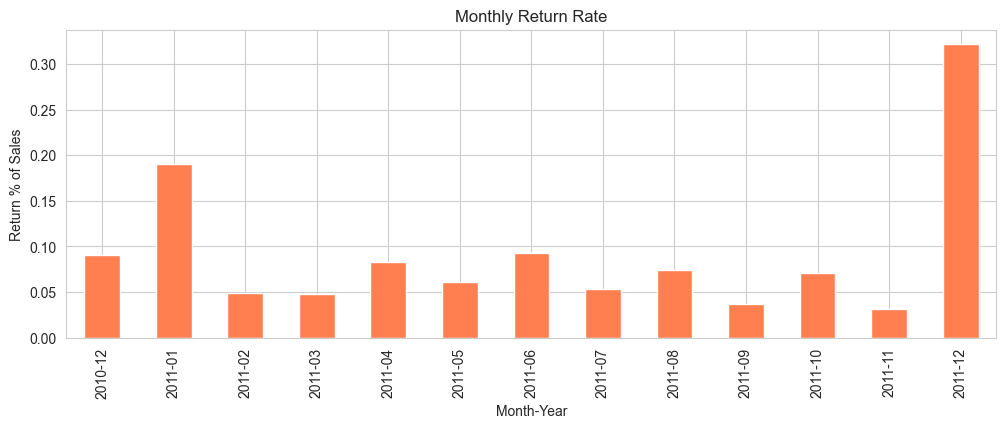

In [14]:
# =========================================================================
# Return Rate by Month :-
# =========================================================================
returns = df_full[df_full["Quantity"] <= 0]
sales = df_full[df_full["Quantity"] > 0]

return_rate = (returns.groupby("InvoiceMonth_Year")["Total_Price"].sum().abs() /
               sales.groupby("InvoiceMonth_Year")["Total_Price"].sum()).fillna(0)

plt.figure(figsize=(12,4))
return_rate.plot(kind='bar', color='coral')
plt.title("Monthly Return Rate")
plt.ylabel("Return % of Sales")
plt.xlabel("Month-Year")
plt.savefig("Return_Rate_By_Month.png")
plt.show()


## RFM Analysis (Recency Frequency Monetary Analysis):-

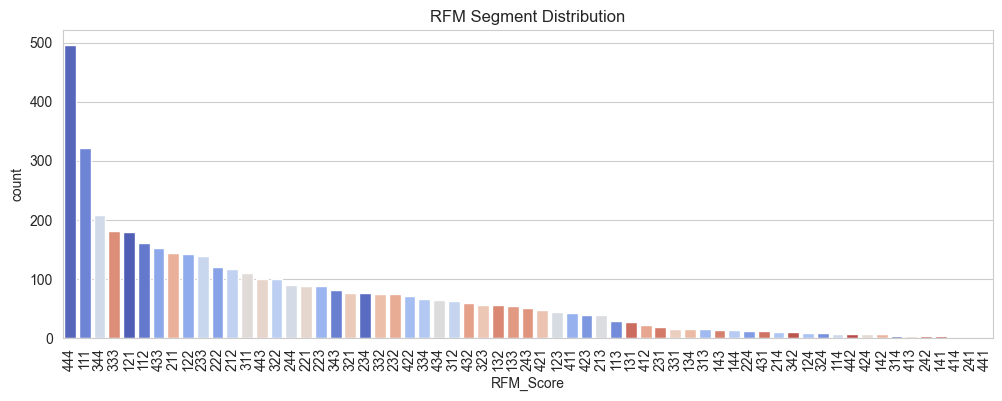

In [15]:
# =========================================================================
# RFM Analysis :-
# =========================================================================
snapshot_date = df_full["InvoiceDate"].max() + pd.Timedelta(days=1)
rfm = df_full[df_full["CustomerID"] != 0].groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "Total_Price": "sum"
})
rfm.columns = ["Recency","Frequency","Monetary"]

# Quartile Scoring
rfm["R_score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])
rfm["RFM_Score"] = rfm["R_score"].astype(str) + rfm["F_score"].astype(str) + rfm["M_score"].astype(str)

# Plot RFM Distribution
plt.figure(figsize=(12,4))
sns.countplot(x="RFM_Score", 
              data=rfm, 
              order=rfm["RFM_Score"].value_counts().index, 
              palette="coolwarm",
              hue="RFM_Score",  
              dodge=False,             
              legend=False)
plt.xticks(rotation=90)
plt.title("RFM Segment Distribution")
plt.savefig("RFM.png")
plt.show()


## Compare Metrics: With vs Without Outliers :-

In [16]:
# =========================================================================
# Compare Metrics (All vs Normal) :-
# =========================================================================
normal = df_full[df_full["Outlier_Flag"]=="Normal"]

def summary_stats(df_):
    return {
        "Rows": df_.shape[0],
        "Total Revenue": df_["Total_Price"].sum(),
        "Avg Unit Price": df_["UnitPrice"].mean(),
        "Avg Quantity": df_["Quantity"].mean(),
        "Median Total Price": df_["Total_Price"].median()
    }

# Create comparison DataFrame
comparison_df = pd.DataFrame([summary_stats(df_full), summary_stats(normal)],
                             index=["All Data", "Normal Only"])

# Format numbers for readability
comparison_df_formatted = comparison_df.copy()
comparison_df_formatted["Total Revenue"] = comparison_df_formatted["Total Revenue"].map("${:,.2f}".format)
comparison_df_formatted["Avg Unit Price"] = comparison_df_formatted["Avg Unit Price"].map("${:,.2f}".format)
comparison_df_formatted["Avg Quantity"] = comparison_df_formatted["Avg Quantity"].map("{:.2f}".format)
comparison_df_formatted["Median Total Price"] = comparison_df_formatted["Median Total Price"].map("${:,.2f}".format)

comparison_df_formatted

,Rows,Total Revenue,Avg Unit Price,Avg Quantity,Median Total Price
All Data,534131,"$9,726,006.95",$4.65,9.92,$9.90
Normal Only,524857,"$7,051,837.72",$4.19,7.98,$9.90


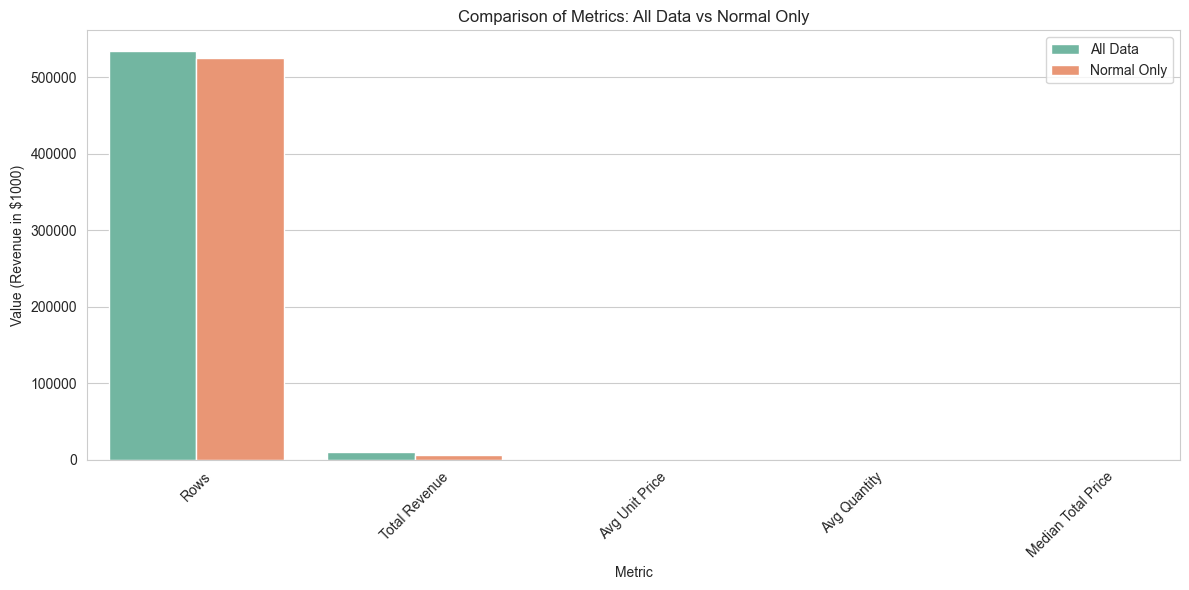

In [17]:
# =========================================================================
# Compare Metrics (All vs Normal) Using Plot :-
# =========================================================================

# Create DataFrame for plotting
comparison_plot_df = pd.DataFrame([summary_stats(df_full), summary_stats(normal)],
                                  index=["All Data", "Normal Only"]).reset_index().melt(id_vars="index")
comparison_plot_df.rename(columns={"index": "Dataset", "variable": "Metric", "value": "Value"}, inplace=True)

# Optional: scale Total Revenue for plotting if needed (e.g., in thousands)
comparison_plot_df["Value_scaled"] = comparison_plot_df.apply(
    lambda row: row["Value"]/1000 if row["Metric"]=="Total Revenue" else row["Value"], axis=1
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=comparison_plot_df, x="Metric", y="Value_scaled", hue="Dataset", palette="Set2")
plt.title("Comparison of Metrics: All Data vs Normal Only")
plt.ylabel("Value (Revenue in $1000)")
plt.xticks(rotation=45)
plt.legend(title="")
plt.tight_layout()
plt.savefig("Metric_All_vs_Normal.png")
plt.show()

## Project Conclusion :-

In [18]:
# =========================================================================
# Project Conclusion :-
# =========================================================================

# Summary:
# - Revenue: $9.7M, 23.7k orders, 4.3k registered customers.
# - Peak month: November 2011.
# - Top products: DOTCOM POSTAGE, REGENCY CAKESTAND 3 TIER.
# - Top customers: 10 registered users contribute majority of revenue.
# - Return rate varies month-wise; RFM analysis identifies loyal & high-value customers.
# - Outlier handling ensures cleaner insights for decision-making.